In [210]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [211]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression

# Iris dataset

In [212]:
# load iris dataset
from sklearn.datasets import load_iris
np.random.seed = 2021
iris = load_iris()
X, y, labels, feature_names = iris['data'], iris['target'], iris['target_names'], iris['feature_names']
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['label'] = y
features_dict = { count: value for count, value in enumerate(labels) }
df_iris['label_names'] = df_iris['label'].apply(lambda label: features_dict[label])

In [213]:
# split to train and test
features_matrix = df_iris[feature_names]
target_array = df_iris['label']
X_train, X_test, y_train, y_test = train_test_split(features_matrix, target_array, test_size=0.2, random_state=42)

In [214]:
# scale features
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [215]:
# train KNN classifiers
n_neighbors = 1
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [216]:
print ('score train = {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print ('score test = {:.3f}'.format(clf.score(X_test_scaled, y_test)))

score train = 1.000
score test = 1.000


In [217]:
k_best = 1
score_best = 1.000
print(f'The best k = {k_best}, score = {score_best}')

The best k = 1, score = 1.0


# Synthetic dataset

<IPython.core.display.Javascript object>


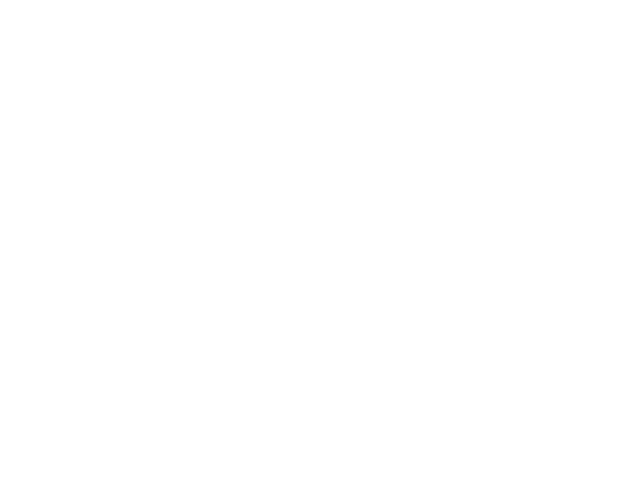

<IPython.core.display.Javascript object>


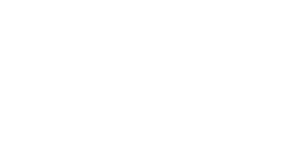

In [218]:
# generate synthetic dataset
from sklearn.datasets import make_blobs
%matplotlib notebook
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [219]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.1, random_state=28)

In [220]:
# scale features
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [221]:
# train KNN regressors for different K
n_neighbors = 2
knn_reg = KNeighborsRegressor(n_neighbors).fit(X_train_scaled, y_train)
print ('score train = {:.3f}'.format(knn_reg.score(X_train_scaled, y_train)))
print ('score test = {:.3f}'.format(knn_reg.score(X_test_scaled, y_test)))

score train = 0.863
score test = 0.881


In [222]:
# find perfect k for different spliting setfind perfect k for different spliting set
for i in range(1, 30):
    scores_train = []
    scores_test=[]
    X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.1, random_state=i)
    scale = StandardScaler().fit(X_train)
    X_train_scaled = scale.transform(X_train)
    X_test_scaled = scale.transform(X_test)
    k_range = range(1,25)


    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(X_train_scaled, y_train)
        scores_train.append(knn.score(X_train_scaled, y_train))
        scores_test.append(knn.score(X_test_scaled, y_test))
    print(f'k={scores_test.index(max(scores_test)) + 1} --> {scores_train[scores_test.index(max(scores_test))]}, train')
    print(f'k={scores_test.index(max(scores_test)) + 1} --> {max(scores_test)}, test')
    print(f'random -->{i}')
    print('----------')
    scores_train = []
    scores_test=[]

k=7 --> 0.7768670105404799, train
k=7 --> 0.807142857142857, test
random -->1
----------
k=2 --> 0.8703419131771033, train
k=2 --> 0.7963800904977375, test
random -->2
----------
k=11 --> 0.7676869981553388, train
k=11 --> 0.6387569649601734, test
random -->3
----------
k=11 --> 0.7625435368598852, train
k=11 --> 0.6858756217044987, test
random -->4
----------
k=16 --> 0.7345486111111111, train
k=16 --> 0.7427083333333333, test
random -->5
----------
k=4 --> 0.7904532967032967, train
k=4 --> 0.75625, test
random -->6
----------
k=13 --> 0.7553703721143656, train
k=13 --> 0.6987871161209135, test
random -->7
----------
k=5 --> 0.7866549604916593, train
k=5 --> 0.8339285714285715, test
random -->8
----------
k=2 --> 0.8664835164835165, train
k=2 --> 0.7749999999999999, test
random -->9
----------
k=11 --> 0.7384689510992062, train
k=11 --> 0.8106060606060607, test
random -->10
----------
k=16 --> 0.7394675925925926, train
k=16 --> 0.721875, test
random -->11
----------
k=8 --> 0.76889594

<IPython.core.display.Javascript object>


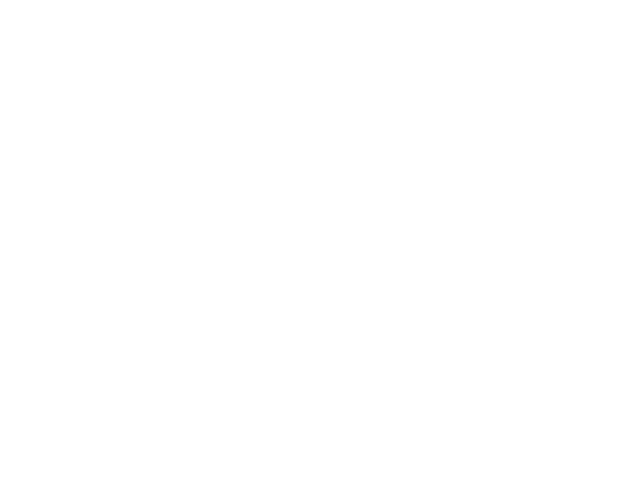

<IPython.core.display.Javascript object>


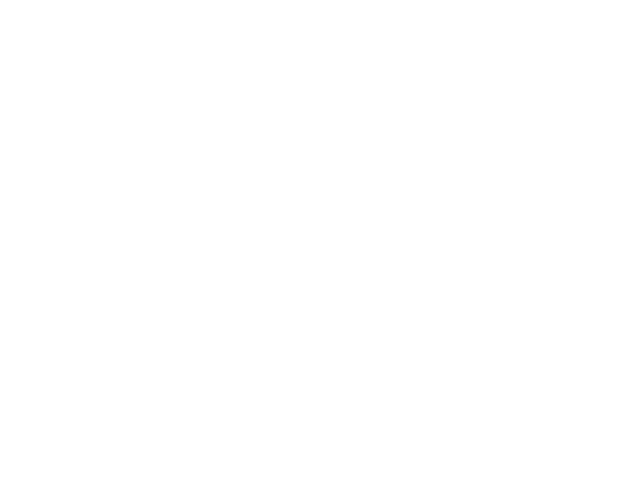

In [223]:
# visualize the decision boundary
fig, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, sharey=True)
k_range = range(1,20)
scores_train = []
scores_test=[]

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores_train.append(knn.score(X_train_scaled, y_train))
    scores_test.append(knn.score(X_test_scaled, y_test))


plt.sca(ax1)
plt.ylabel('accuracy')

ax1.scatter(k_range, scores_train)


plt.sca(ax2)
plt.xlabel('k')

plt.ylabel('accuracy')
ax2.scatter(k_range, scores_test)
plt.xticks(range(21));
fig.subplots_adjust(hspace=.6)
ax1.set_title('train set');
ax2.set_title('test set');

In [224]:
k_best = n_neighbors
score_best = 0.881
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 2 , score = 0.881
